<a href="https://colab.research.google.com/github/narendrasingh125/Datasets-for-projects/blob/main/New_AI_over_NWP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing important Libraries**

In [ ]:
import numpy as np
import math
from scipy import stats
import time
from datetime import datetime
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.optimizers import Adam

# **Preprocessing of Dataset**

In [ ]:
df=pd.read_csv(r"/content/weather_madrid_LEMD_1997_2015.csv")

In [ ]:
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [ ]:
df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [ ]:
df.columns=['Date','Tmax','TmeanC','Tmin','Dew PointC','DewC', 'Min DewpointC', 'Max Humidity',
       'Humidity','Min Humidity', ' Max Sea Level PressurehPa',
       'PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', 'VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', 'Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitation', 'CloudCover', 'Events', 'WindDirDegrees']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.shape

(6812, 22)

In [ ]:
df.corr(numeric_only=True)

,Tmax,TmeanC,Tmin,Dew PointC,DewC,Min DewpointC,Max Humidity,Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitation,CloudCover,WindDirDegrees
Tmax,1.000000,0.970983,0.856143,0.583509,0.495857,0.329547,-0.718184,-0.805961,-0.761490,-0.081856,...,-0.042676,0.126435,0.299083,0.388285,0.025244,-0.073119,-0.135634,-0.068196,-0.449610,0.000365
TmeanC,0.970983,1.000000,0.951917,0.691818,0.615279,0.448551,-0.695012,-0.742891,-0.663245,-0.191302,...,-0.145113,0.111687,0.251678,0.324891,0.114279,0.031273,-0.050422,-0.036425,-0.345945,-0.028099
Tmin,0.856143,0.951917,1.000000,0.774345,0.719411,0.566974,-0.609253,-0.601402,-0.480082,-0.320240,...,-0.264441,0.060010,0.152724,0.209503,0.216444,0.160338,0.065168,0.002736,-0.182263,-0.063438
Dew PointC,0.583509,0.691818,0.774345,1.000000,0.944158,0.810374,-0.067080,-0.099535,-0.083950,-0.269354,...,-0.224968,0.021202,-0.007272,-0.046049,0.134826,0.026668,0.079647,0.078278,0.040980,-0.017147
DewC,0.495857,0.615279,0.719411,0.944158,1.000000,0.927150,0.040494,0.035249,0.054067,-0.257814,...,-0.201594,-0.002864,-0.048571,-0.098862,0.071934,-0.017669,0.040261,0.081459,0.111029,-0.036015
Min DewpointC,0.329547,0.448551,0.566974,0.810374,0.927150,1.000000,0.151249,0.182515,0.223808,-0.217307,...,-0.159441,-0.038811,-0.102658,-0.154535,0.008618,-0.052743,0.007908,0.074127,0.187659,-0.035776
Max Humidity,-0.718184,-0.695012,-0.609253,-0.067080,0.040494,0.151249,1.000000,0.906844,0.728340,0.098442,...,0.081303,-0.105546,-0.300061,-0.447324,-0.147063,-0.157770,0.020161,0.106557,0.449280,0.036646
Humidity,-0.805961,-0.742891,-0.601402,-0.099535,0.035249,0.182515,0.906844,1.000000,0.919634,0.057736,...,0.045010,-0.173519,-0.394684,-0.538315,-0.138509,-0.116879,0.073199,0.114354,0.572034,0.017532
Min Humidity,-0.761490,-0.663245,-0.480082,-0.083950,0.054067,0.223808,0.728340,0.919634,1.000000,-0.041456,...,-0.032113,-0.298171,-0.476237,-0.551916,-0.080813,-0.030248,0.124931,0.090661,0.610060,-0.022018
Max Sea Level PressurehPa,-0.081856,-0.191302,-0.320240,-0.269354,-0.257814,-0.217307,0.098442,0.057736,-0.041456,1.000000,...,0.916735,0.031812,0.067799,0.066024,-0.417619,-0.380324,-0.371865,-0.102311,-0.201005,0.015054


In [ ]:
df1=df[['TmeanC','DewC','Wind SpeedKm/h','Humidity','PressurehPa','VisibilityKm','Precipitation','CloudCover','WindDirDegrees','Events']]

In [ ]:
df1.head()

,TmeanC,DewC,Wind SpeedKm/h,Humidity,PressurehPa,VisibilityKm,Precipitation,CloudCover,WindDirDegrees,Events
Date,,,,,,,,,,
1997-01-01,4.0,3.0,6,95.0,1008,9.0,0.0,6.0,229,NaN
1997-01-02,3.0,3.0,8,92.0,1003,9.0,0.0,5.0,143,Rain
1997-01-03,3.0,1.0,19,85.0,999,10.0,0.0,6.0,256,Rain-Snow
1997-01-04,3.0,-3.0,19,63.0,1010,10.0,0.0,2.0,284,NaN
1997-01-05,0.0,0.0,6,95.0,1008,5.0,0.0,7.0,2,Snow


In [ ]:
df1.isnull().sum()

,0
TmeanC,3
DewC,2
Wind SpeedKm/h,0
Humidity,2
PressurehPa,0
VisibilityKm,940
Precipitation,0
CloudCover,1372
WindDirDegrees,0
Events,5014


In [ ]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TmeanC,6809.0,NaN,NaN,NaN,14.658687,7.580461,-3.0,8.0,14.0,21.0,32.0
DewC,6810.0,NaN,NaN,NaN,4.976211,4.65427,-15.0,2.0,6.0,8.0,16.0
Wind SpeedKm/h,6812.0,NaN,NaN,NaN,9.170728,5.110013,0.0,6.0,8.0,11.0,39.0
Humidity,6810.0,NaN,NaN,NaN,57.971366,19.675744,15.0,41.0,59.0,74.0,100.0
PressurehPa,6812.0,NaN,NaN,NaN,1017.973136,6.480085,986.0,1014.0,1018.0,1022.0,1043.0
VisibilityKm,5872.0,NaN,NaN,NaN,11.719857,5.592324,0.0,10.0,10.0,10.0,31.0
Precipitation,6812.0,NaN,NaN,NaN,0.111182,0.967174,0.0,0.0,0.0,0.0,32.0
CloudCover,5440.0,NaN,NaN,NaN,3.206066,1.808948,0.0,2.0,3.0,5.0,8.0
WindDirDegrees,6812.0,NaN,NaN,NaN,197.234586,119.872777,-1.0,66.0,223.0,299.0,360.0
Events,1798,15,Rain,1140,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.corr(numeric_only=True)

,TmeanC,DewC,Wind SpeedKm/h,Humidity,PressurehPa,VisibilityKm,Precipitation,CloudCover,WindDirDegrees
TmeanC,1.000000,0.615279,0.031273,-0.742891,-0.123744,0.251678,-0.036425,-0.345945,-0.028099
DewC,0.615279,1.000000,-0.017669,0.035249,-0.218129,-0.048571,0.081459,0.111029,-0.036015
Wind SpeedKm/h,0.031273,-0.017669,1.000000,-0.116879,-0.424301,0.048794,0.066417,0.049950,-0.020124
Humidity,-0.742891,0.035249,-0.116879,1.000000,0.005010,-0.394684,0.114354,0.572034,0.017532
PressurehPa,-0.123744,-0.218129,-0.424301,0.005010,1.000000,0.039259,-0.126434,-0.238943,0.004340
VisibilityKm,0.251678,-0.048571,0.048794,-0.394684,0.039259,1.000000,0.015953,-0.185651,0.046347
Precipitation,-0.036425,0.081459,0.066417,0.114354,-0.126434,0.015953,1.000000,0.110240,-0.031164
CloudCover,-0.345945,0.111029,0.049950,0.572034,-0.238943,-0.185651,0.110240,1.000000,-0.041180
WindDirDegrees,-0.028099,-0.036015,-0.020124,0.017532,0.004340,0.046347,-0.031164,-0.041180,1.000000


## **Data Visualisation**

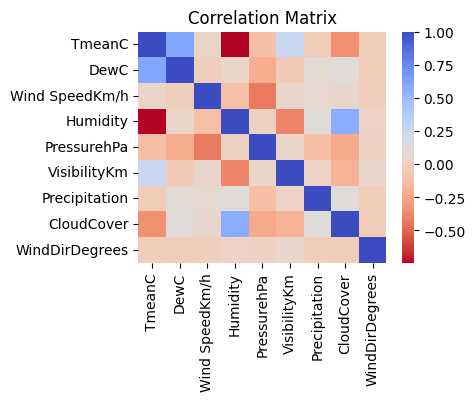

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(df1.corr(numeric_only=True), cmap='coolwarm_r')#sns.heatmap(df2.drop('date',axis=1.corr(), cmap='coolwarm_r')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#helper plot function
import matplotlib.pyplot as plt
def plot_series(series_dict, start=0, t=df1.index):
  plt.figure(figsize=(4,3))
  for label, series in series_dict.items():
    plt.plot(t[start:], series[start:], label=label)
  plt.legend()
  plt.show()

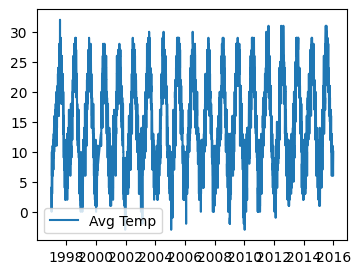

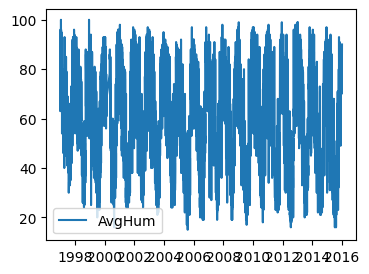

In [ ]:
plot_series({'Avg Temp': df1.TmeanC})
plot_series({'AvgHum':df1.Humidity})

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


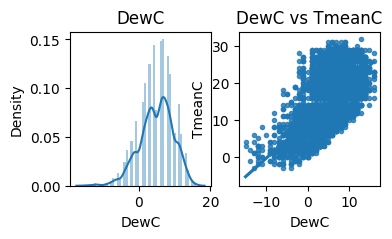

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


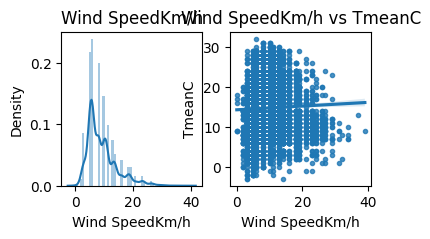

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


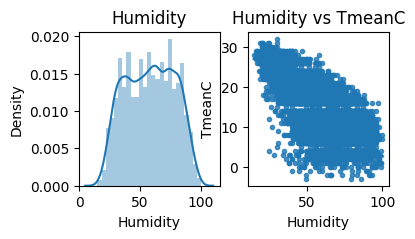

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


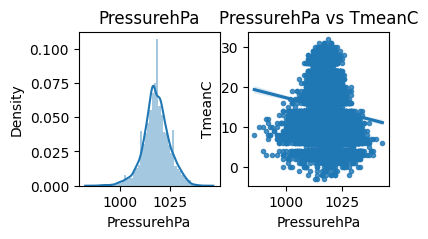

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


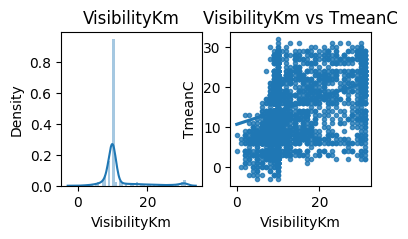

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


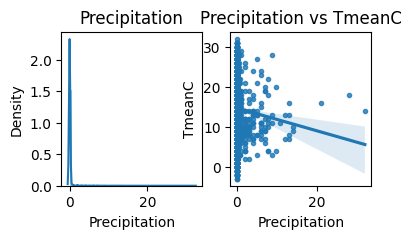

<ipython-input-65-c00a65f094ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[f],ax=ax0)


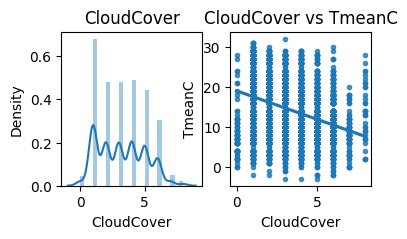

In [ ]:
import seaborn as sns
def plot_feature(f):
  _, (ax0,ax1) = plt.subplots(1,2,figsize=(4,2))
  sns.distplot(df1[f],ax=ax0)
  ax0.set_title(f)
  sns.regplot(y='TmeanC',x=f,data=df1,ax=ax1,marker='.')
  ax1.set_title(f'{f} vs TmeanC')
  plt.show()
for f in df1.columns[1:-2]:
  plot_feature(f)

In [ ]:
df1['CloudCover'].fillna(df1['CloudCover'].mean(),inplace=True)
df1['WindDirDegrees'].fillna(df1['WindDirDegrees'].mean(),inplace=True)
df1['Precipitation'].fillna(df1['Precipitation'].mean(),inplace=True)
df1['VisibilityKm'].fillna(df1['VisibilityKm'].mean(),inplace=True)
df1['Humidity'].fillna(df1['Humidity'].mean(),inplace=True)
df1['PressurehPa'].fillna(df1['PressurehPa'].mean(),inplace=True)
df1['Wind SpeedKm/h'].fillna(df1['Wind SpeedKm/h'].mean(),inplace=True)
df1['DewC'].fillna(df1['DewC'].mean(),inplace=True)
df1['TmeanC'].fillna(df1['TmeanC'].mean(),inplace=True)
# df1['Events'].fillna(df1['Events'].mode()[0],inplace=True)

<ipython-input-67-66609a603096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CloudCover'].fillna(df1['CloudCover'].mean(),inplace=True)
<ipython-input-67-66609a603096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WindDirDegrees'].fillna(df1['WindDirDegrees'].mean(),inplace=True)
<ipython-input-67-66609a603096>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Precipitation'].fillna(df1['Precipitation'].mean(),inpl

In [ ]:
df1.isnull().sum()

,0
TmeanC,0
DewC,0
Wind SpeedKm/h,0
Humidity,0
PressurehPa,0
VisibilityKm,0
Precipitation,0
CloudCover,0
WindDirDegrees,0
Events,5014


In [ ]:
df1.head()

,TmeanC,DewC,Wind SpeedKm/h,Humidity,PressurehPa,VisibilityKm,Precipitation,CloudCover,WindDirDegrees,Events
Date,,,,,,,,,,
1997-01-01,4.0,3.0,6,95.0,1008,9.0,0.0,6.0,229,NaN
1997-01-02,3.0,3.0,8,92.0,1003,9.0,0.0,5.0,143,Rain
1997-01-03,3.0,1.0,19,85.0,999,10.0,0.0,6.0,256,Rain-Snow
1997-01-04,3.0,-3.0,19,63.0,1010,10.0,0.0,2.0,284,NaN
1997-01-05,0.0,0.0,6,95.0,1008,5.0,0.0,7.0,2,Snow


In [ ]:
df1.dropna(inplace=True)

<ipython-input-70-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1798 entries, 1997-01-02 to 2015-12-31
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TmeanC          1798 non-null   float64
 1   DewC            1798 non-null   float64
 2   Wind SpeedKm/h  1798 non-null   int64  
 3   Humidity        1798 non-null   float64
 4   PressurehPa     1798 non-null   int64  
 5   VisibilityKm    1798 non-null   float64
 6   Precipitation   1798 non-null   float64
 7   CloudCover      1798 non-null   float64
 8   WindDirDegrees  1798 non-null   int64  
 9   Events          1798 non-null   object 
dtypes: float64(6), int64(3), object(1)
memory usage: 154.5+ KB


In [ ]:
df1['Events'].value_counts()

,count
Events,
Rain,1140
Rain-Thunderstorm,247
Fog,233
Fog-Rain,69
Thunderstorm,45
Rain-Snow,33
Snow,14
Rain-Hail-Thunderstorm,7
Fog-Snow,4


In [ ]:
df2 = pd.get_dummies(df1, columns = ['Events'])

In [ ]:
df2.head()

,TmeanC,DewC,Wind SpeedKm/h,Humidity,PressurehPa,VisibilityKm,Precipitation,CloudCover,WindDirDegrees,Events_Fog,...,Events_Fog-Thunderstorm,Events_Rain,Events_Rain-Hail,Events_Rain-Hail-Thunderstorm,Events_Rain-Snow,Events_Rain-Snow-Thunderstorm,Events_Rain-Thunderstorm,Events_Snow,Events_Thunderstorm,Events_Tornado
Date,,,,,,,,,,,,,,,,,,,,,
1997-01-02,3.0,3.0,8,92.0,1003,9.0,0.0,5.0,143,False,...,False,True,False,False,False,False,False,False,False,False
1997-01-03,3.0,1.0,19,85.0,999,10.0,0.0,6.0,256,False,...,False,False,False,False,True,False,False,False,False,False
1997-01-05,0.0,0.0,6,95.0,1008,5.0,0.0,7.0,2,False,...,False,False,False,False,False,False,False,True,False,False
1997-01-07,0.0,-1.0,2,93.0,1014,7.0,0.0,7.0,43,False,...,False,False,False,False,False,False,False,True,False,False
1997-01-08,4.0,4.0,8,96.0,1005,8.0,0.0,7.0,273,False,...,False,True,False,False,False,False,False,False,False,False


# **Workflow of RNN LSTM Model**

**1.Data Normalisation**

**2.Splitting the Dataset into train and test parts**

**3.Training the Model**

**4.Predicting Target Variables**

**5.Model Review**

   **a.Model Validation**
  
   **b.Model Visualisation**

# **Normalizing** the data into 0 to 1 using MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
df1_transformed=scaler.fit_transform(df1)
df1_transformed

array([[3.09504132e-01, 2.77386291e-01, 5.22593320e-01, ...,
        9.93123226e-01, 2.78125435e-03, 3.15478535e-01],
       [3.04958678e-01, 1.62716208e-01, 5.60794586e-01, ...,
        9.93490384e-01, 6.95313586e-04, 3.25718787e-01],
       [3.27685950e-01, 6.21396541e-02, 2.92075966e-01, ...,
        9.93788080e-01, 0.00000000e+00, 2.46947617e-01],
       ...,
       [4.87603306e-01, 2.37668161e-01, 8.62257149e-01, ...,
        9.98352750e-01, 2.78125435e-04, 5.93540764e-01],
       [4.83884298e-01, 1.72325432e-01, 7.42196027e-01, ...,
        9.98233671e-01, 4.17188152e-04, 5.52579756e-01],
       [5.00000000e-01, 1.24919923e-01, 7.24514298e-01, ...,
        9.97866513e-01, 7.78751217e-03, 5.62032296e-01]])

# **Split of Dataset into train and test**

In [ ]:
def split_sequence(sequence,n_steps_in,n_steps_out):
  X,y,X_test,y_test=list(),list(),list(),list()
  for i in range(len(sequence)):
    end_ix=i+n_steps_in
    out_end_ix=end_ix+n_steps_out
    if out_end_ix>len(sequence):
      break
    seq_x,seq_y=sequence[i:end_ix],sequence[end_ix:out_end_ix]

    if i<=6000:
      X.append(seq_x)
      y.append(seq_y)
    else:
      X_test.append(seq_x)
      y_test.append(seq_y)

  return np.array(X),np.array(y),np.array(X_test),np.array(y_test)

In [ ]:
n_steps_in, n_steps_out=120,1

X, y, X_test, y_test = split_sequence(df1_transformed,n_steps_in,n_steps_out)

n_features,n_epochs,n_neurons=df1.columns.size,10,50
X=X.reshape((X.shape[0],X.shape[1],n_features))
y=y.reshape((y.shape[0],y.shape[1],n_features))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],n_features))
y_test=y_test.reshape((y_test.shape[0],y_test.shape[1],n_features))

In [ ]:
X.shape,y.shape,X_test.shape,y_test.shape

((6001, 120, 7), (6001, 1, 7), (2036, 120, 7), (2036, 1, 7))

# **Training the Model**

In [ ]:
model=Sequential()
model.add(LSTM(n_neurons, activation='tanh', input_shape=(n_steps_in,n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(n_neurons,activation='tanh',return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam',loss='mse')
model.fit(X[:-1],y[:-1],epochs=n_epochs,verbose=1)

Epoch 1/10
188/188 [==============================] - 14s 55ms/step - loss: 0.0337
Epoch 2/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0103
Epoch 3/10
188/188 [==============================] - 10s 54ms/step - loss: 0.0089
Epoch 4/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0078
Epoch 5/10
188/188 [==============================] - 10s 54ms/step - loss: 0.0072
Epoch 6/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0069
Epoch 7/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0065
Epoch 8/10
188/188 [==============================] - 11s 58ms/step - loss: 0.0065
Epoch 9/10
188/188 [==============================] - 10s 54ms/step - loss: 0.0063
Epoch 10/10
188/188 [==============================] - 10s 55ms/step - loss: 0.0062


In [ ]:
Y_real=scaler.inverse_transform(y_test[:,0])
Y_real[:,0]

array([22.13, 22.32, 21.6 , ..., 16.45, 16.36, 16.75])

In [ ]:
df1.tail()

,Temperature,WindSpeed,RelHumidity,Pressure,Irradiance,Precipitation,Dew
Date,,,,,,,
2022-04-27,16.34,2.11,81.31,101.61,5.47,0.00,13.15
2022-04-28,16.38,5.08,89.75,101.90,5.17,0.00,14.67
2022-04-29,16.45,4.12,91.31,102.20,7.08,0.02,15.01
2022-04-30,16.36,3.10,85.81,102.01,6.96,0.03,13.97
2022-01-05,16.75,2.36,85.00,101.73,6.59,0.56,14.21


# **Predicting the Target Variables**

In [ ]:
Y_predict=[]
for i in range(len(X_test)):
  x_pred=X_test[i].reshape((1,X_test[i].shape[0],n_features))
  y_pred=model.predict(x_pred)
  y_pred_itrans=scaler.inverse_transform(y_pred[0])
  Y_predict.append(y_pred_itrans)

In [ ]:
Temperature,RelHumidity,Pressure,WindSpeed,Irradiance,Precipitation,Dew=[],[],[],[],[],[],[]
for elements in Y_predict:
  Temperature.append(elements[0][0])
  WindSpeed.append(elements[0][1])
  RelHumidity.append(elements[0][2])
  Pressure.append(elements[0][3])
  Irradiance.append(elements[0][4])
  Precipitation.append(elements[0][5])
  Dew.append(elements[0][6])


# **Model Review**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

temp_mae=mean_absolute_error(Temperature,Y_real[:,0])
temp_rmse=sqrt(mean_squared_error(Temperature,Y_real[:,0]))
temp_mape=mean_absolute_percentage_error(Temperature,Y_real[:,0])
temp_score=100-float(temp_mape)

wind_speed_mae=mean_absolute_error(WindSpeed,Y_real[:,1])
wind_speed_rmse=sqrt(mean_squared_error(WindSpeed,Y_real[:,1]))
wind_speed_mape=mean_absolute_percentage_error(WindSpeed,Y_real[:,1])
wind_speed_score=100-float(wind_speed_mape)

humidity_mae=mean_absolute_error(RelHumidity,Y_real[:,2])
humidity_rmse=sqrt(mean_squared_error(RelHumidity,Y_real[:,2]))
humidity_mape=mean_absolute_percentage_error(RelHumidity,Y_real[:,2])
humidity_score=100-float(humidity_mape)

pressure_mae=mean_absolute_error(Pressure,Y_real[:,3])
pressure_rmse=sqrt(mean_squared_error(Pressure,Y_real[:,3]))
pressure_mape=mean_absolute_percentage_error(Pressure,Y_real[:,3])
pressure_score=100-float(pressure_mape)

solar_radiation_mae=mean_absolute_error(Irradiance,Y_real[:,4])
solar_radiation_rmse=sqrt(mean_squared_error(Irradiance,Y_real[:,4]))
solar_radiation_mape=mean_absolute_percentage_error(Irradiance,Y_real[:,4])
solar_radiation_score=100-float(solar_radiation_mape)

Precipitation_mae=mean_absolute_error(Precipitation,Y_real[:,5])
Precipitation_rmse=sqrt(mean_squared_error(Precipitation,Y_real[:,5]))
Precipitation_mape=mean_absolute_percentage_error(Precipitation,Y_real[:,5])
Precipitation_score=100-float(Precipitation_mape)

Dew_mae=mean_absolute_error(Dew,Y_real[:,6])
Dew_rmse=sqrt(mean_squared_error(Dew,Y_real[:,6]))
Dew_mape=mean_absolute_percentage_error(Dew,Y_real[:,6])
Dew_score=100-float(Dew_mape)

In [ ]:
predicted_table=pd.DataFrame({
    'Variable':['Temperature','WindSpeed','RelHumidity','Pressure','Irradiance','Precipitation','Dew'],
    'MAE':[temp_mae,humidity_mae,pressure_mae,wind_speed_mae,solar_radiation_mae,Precipitation_mae,Dew_mae],
    'RMSE':[temp_rmse,humidity_rmse,pressure_rmse,wind_speed_rmse,solar_radiation_rmse,Precipitation_rmse,Dew_rmse],
    'MAPE':[temp_mape,humidity_mape,pressure_mape,wind_speed_mape,solar_radiation_mape,Precipitation_rmse,Dew_rmse],
    'Accuracy':[temp_score,humidity_score,pressure_score,wind_speed_score,solar_radiation_score,Precipitation_score,Dew_score]
})

predicted_table=predicted_table.set_index('Variable')
predicted_table

,MAE,RMSE,MAPE,Accuracy
Variable,,,,
Temperature,0.728340,0.957495,0.390341,95.664323
WindSpeed,4.626240,5.802758,6.096719,93.903281
RelHumidity,0.273813,0.371576,0.269203,99.730797
Pressure,1.421166,1.835094,31.924880,68.075120
Irradiance,4.203308,22.674917,450.250028,-350.250028
Precipitation,1.981208,4.991159,4.991159,-103.282256
Dew,1.334167,1.698324,1.698324,88.665255


In [ ]:
df1.describe()

,Temperature,WindSpeed,RelHumidity,Pressure,Irradiance,Precipitation,Dew
count,8157.000000,8157.000000,8157.000000,8157.000000,8157.000000,8157.000000,8157.000000
mean,18.028605,4.844806,77.464131,101.645813,4.421090,1.635517,13.961773
std,4.848340,2.362826,7.662447,0.663490,11.338365,4.788396,4.967135
min,4.650000,0.410000,51.810000,98.660000,-999.000000,0.000000,-0.060000
25%,13.880000,3.040000,71.620000,101.280000,2.500000,0.000000,10.230000
50%,17.170000,4.420000,77.310000,101.660000,4.360000,0.040000,13.670000
75%,22.550000,6.200000,83.060000,102.040000,6.660000,0.820000,18.020000
max,28.850000,16.020000,97.620000,103.920000,8.740000,71.910000,25.330000


# **Model Visualisation**

In [ ]:
len(Y_real)

2036

Text(0, 0.5, 'Temperature')

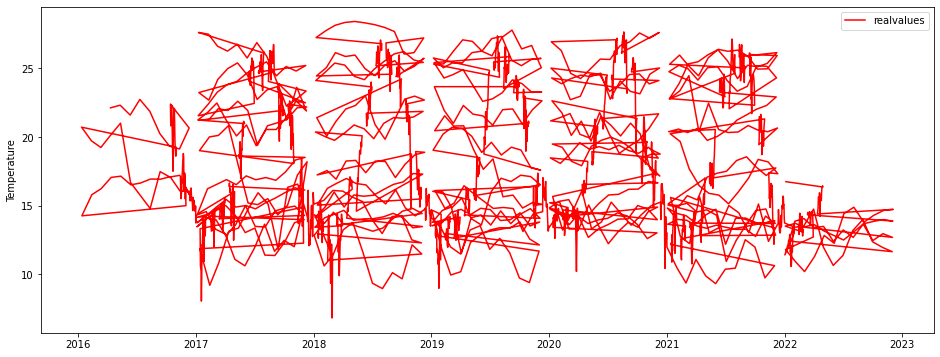

In [ ]:
date=df1.tail(2036).index
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,0],c='red',label='realvalues')
# plt.plot(date,Temperature,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Temperature')

Text(0, 0.5, 'WindSpeed')

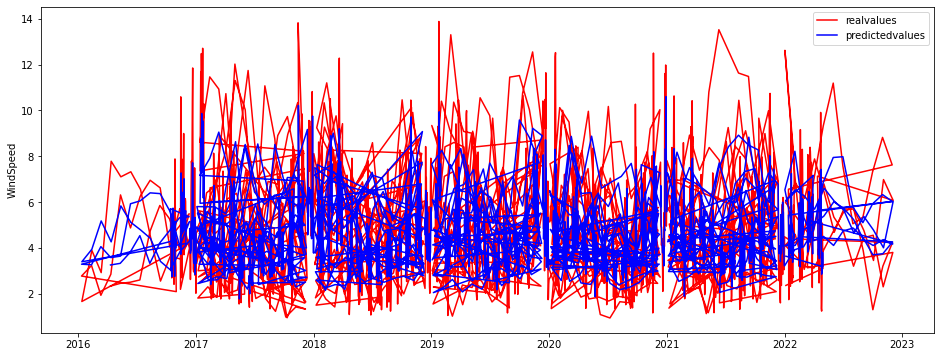

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,1],c='red',label='realvalues')
plt.plot(date,WindSpeed,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('WindSpeed')

Text(0, 0.5, 'RelHumidity')

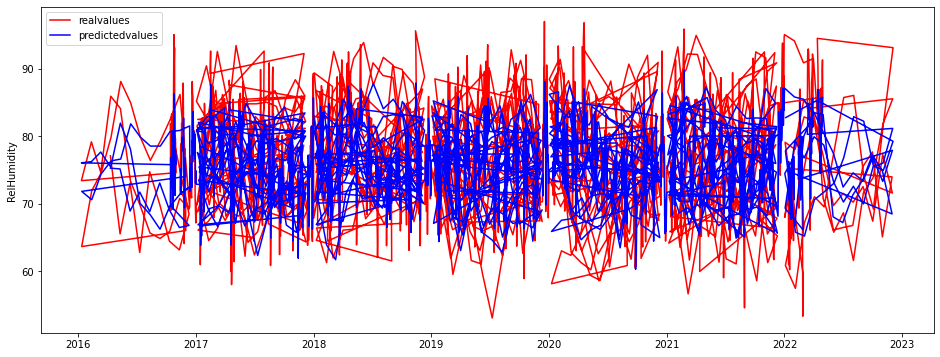

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,2],c='red',label='realvalues')
plt.plot(date,RelHumidity,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('RelHumidity')

Text(0, 0.5, 'Pressure')

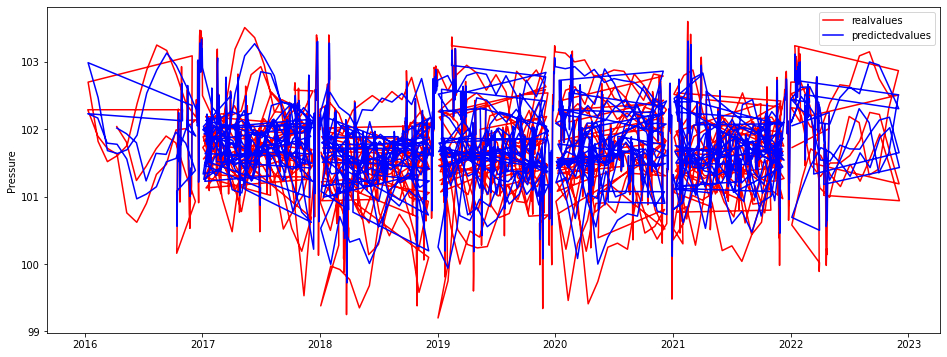

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,3],c='red',label='realvalues')
plt.plot(date,Pressure,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Pressure')

Text(0, 0.5, 'Irradiance')

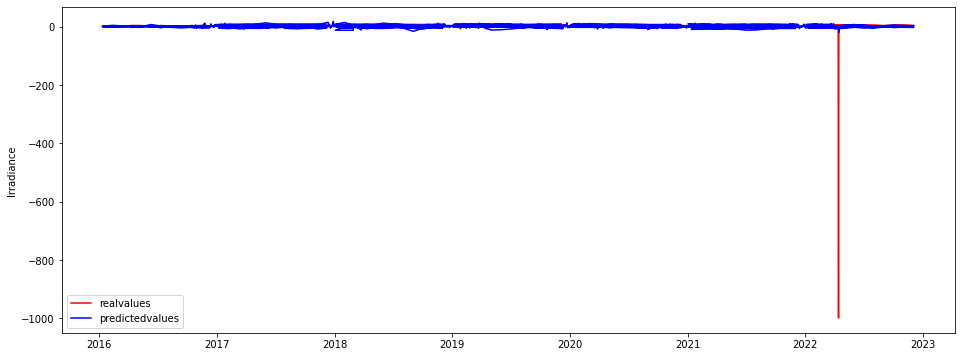

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,4],c='red',label='realvalues')
plt.plot(date,Irradiance,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Irradiance')

Text(0, 0.5, 'Precipitation')

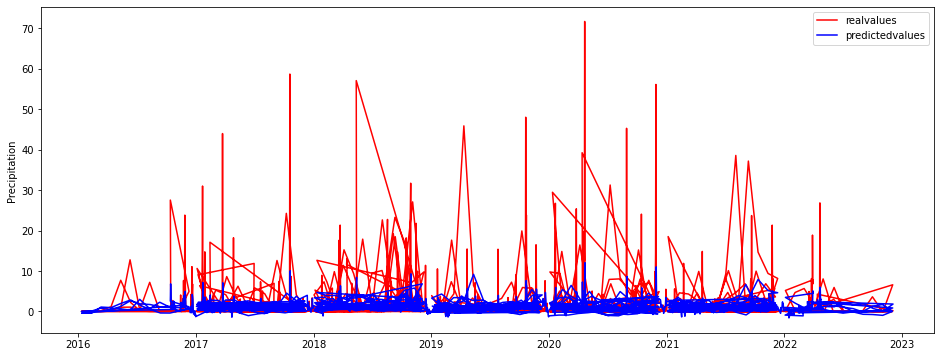

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,5],c='red',label='realvalues')
plt.plot(date,Precipitation,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Precipitation')

Text(0, 0.5, 'Dew')

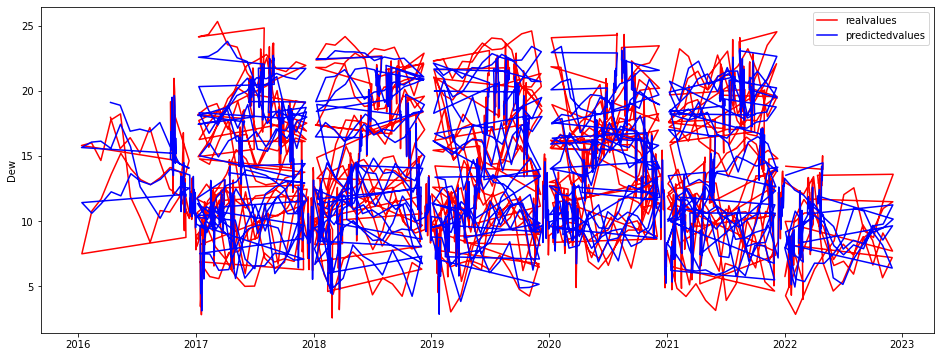

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(date,Y_real[:,6],c='red',label='realvalues')
plt.plot(date,Dew,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Dew')

# **Model Comparison**

In [ ]:
train_data=df1.drop('Temperature',axis=1)
target_data=df1['Temperature']

train_X,test_X,train_y,test_y = train_test_split(train_data,target_data,test_size=0.25,random_state=4)

In [ ]:
train_X.shape,test_y.shape

((6117, 6), (2040,))

# **Polynomial Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
Pol_reg=PolynomialFeatures(degree=2)
X_train =Pol_reg.fit_transform(train_X)
X_test=Pol_reg.fit_transform(test_X)
Pol_reg.fit(X_train,train_y)
reg= LinearRegression()
reg.fit(X_train,train_y)
pred1=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(test_y,pred):
  test_y,pred=np.array(test_y),np.array(pred)
  return np.mean(np.abs((test_y-pred)/test_y))*100

temp_mape=mean_absolute_percentage_error(test_y,pred1)
Accuracy=(100-float(temp_mape))
Accuracy

99.8817665833103

Text(0, 0.5, 'Temperature')

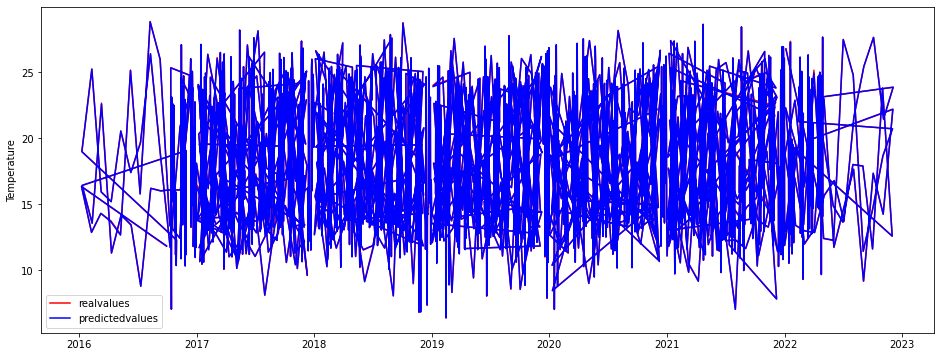

In [ ]:
date=df1.tail(2040).index
plt.figure(figsize=(16,6))
plt.plot(date,test_y,c='red',label='realvalues')
plt.plot(date,pred1,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Temperature')

# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(train_X,train_y)
pred2 = DTReg.predict(test_X)

In [ ]:
temp_mape=mean_absolute_percentage_error(test_y,pred2)
Accuracy1=(100-float(temp_mape))
Accuracy1

99.0798005483571

Text(0, 0.5, 'Temperature')

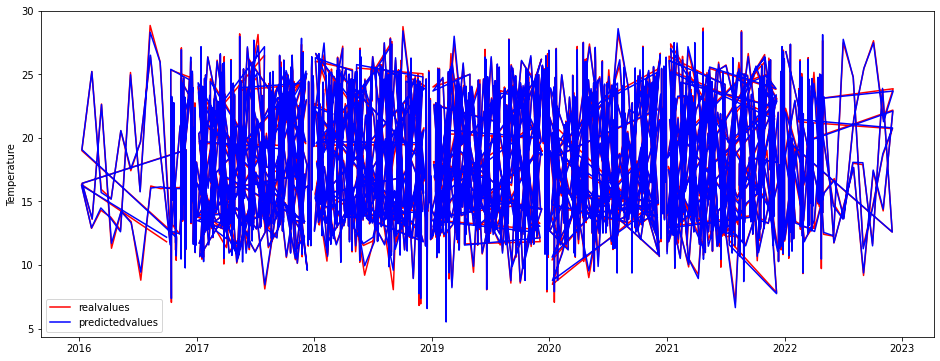

In [ ]:
date=df1.tail(2040).index
plt.figure(figsize=(16,6))
plt.plot(date,test_y,c='red',label='realvalues')
plt.plot(date,pred2,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Temperature')

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg=RandomForestRegressor()
RFReg.fit(train_X,train_y)
pred3=RFReg.predict(test_X)

In [ ]:
temp_mape=mean_absolute_percentage_error(test_y,pred3)
Accuracy2=(100-float(temp_mape))
Accuracy2

99.60965884130525

Text(0, 0.5, 'Temperature')

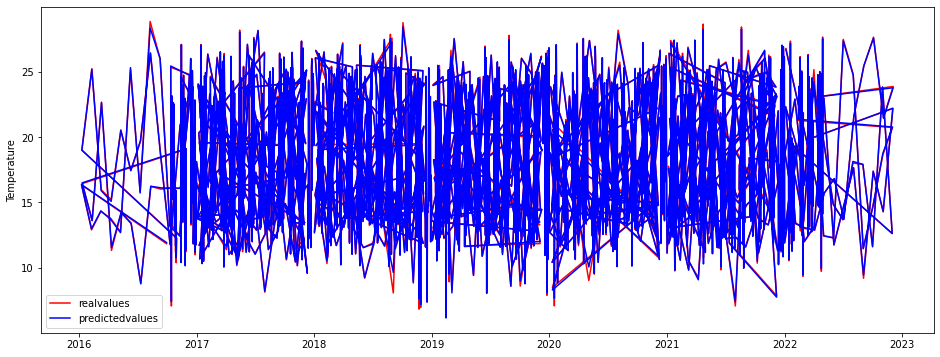

In [ ]:
date=df1.tail(2040).index
plt.figure(figsize=(16,6))
plt.plot(date,test_y,c='red',label='realvalues')
plt.plot(date,pred3,c='blue',label='predictedvalues')
plt.legend();plt.ylabel('Temperature')

# **RESULTS**

In [ ]:
results=pd.DataFrame({
    'Model_Name':['RNN(LSTM)','Multinomial Regression','Decision Tree Regressor','Random Forest Regressor'],
    'Accuracy':[temp_score,Accuracy,Accuracy1,Accuracy2]
})

# results=results.set_index('Model_Name')
results

,Model_Name,Accuracy
0,RNN(LSTM),95.664323
1,Multinomial Regression,99.609659
2,Decision Tree Regressor,99.092331
3,Random Forest Regressor,99.609659
